In [1]:
# Notebook library imports

import pandas as pd
import numpy as np

In [2]:
# %load get_data.py
def get_data() :
    
    import pandas as pd
    
    csv_beer = pd.read_csv("/home/grimoire/Projects/BeerRatings/beer_reviews.csv")
    beer_ratings = pd.DataFrame(csv_beer)
    
    return beer_ratings

In [3]:
beer_ratings = get_data()

In [4]:
beer_ratings.keys()

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [5]:
len(beer_ratings.brewery_name.unique())

5743

In [6]:
len(beer_ratings.review_profilename.unique())

33388

In [7]:
len(beer_ratings.beer_style.unique())

104

In [8]:
beer_ratings.loc[:,['review_overall','review_aroma','review_appearance',
                    'review_palate','review_taste','beer_abv']].describe()

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06
mean,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00
std,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02
25%,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00
50%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00
75%,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01


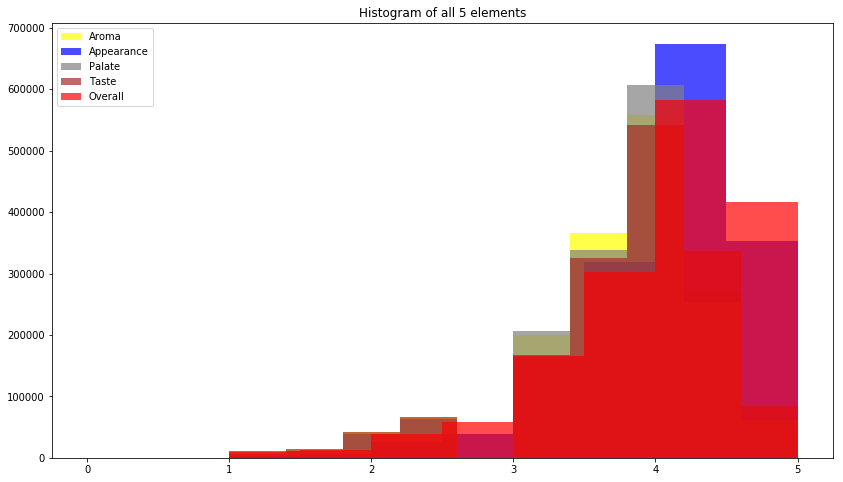

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=[14,8])

plt.hist(beer_ratings.review_aroma.values, alpha=.7, color='yellow', label='Aroma')
plt.hist(beer_ratings.review_appearance.values, alpha=.7, color='blue', label='Appearance')
plt.hist(beer_ratings.review_palate.values, alpha=.7, color='grey', label='Palate')
plt.hist(beer_ratings.review_taste.values, alpha=.7, color='brown', label='Taste')
plt.hist(beer_ratings.review_overall.values, alpha=.7, color='red', label='Overall')

plt.title('Histogram of all 5 elements')
plt.legend(loc=2)

plt.show()

In [10]:
beer_ratings.keys()

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [11]:
reviews = beer_ratings.loc[:,['review_profilename', 'beer_name', 'brewery_name', 'beer_style']]

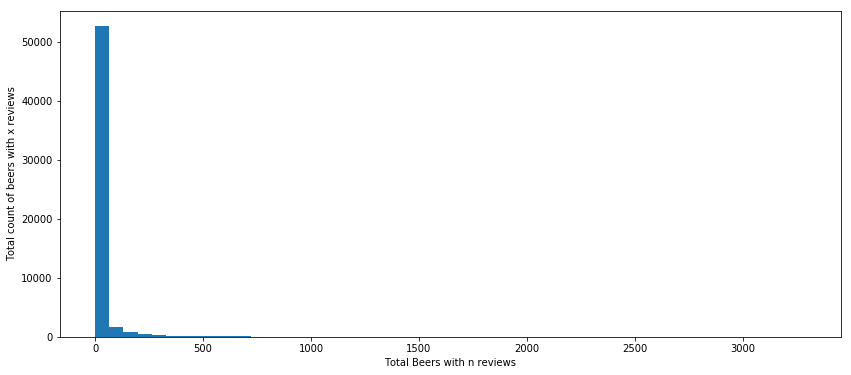

,review_profilename
count,56857.000000
mean,27.899221
std,122.167414
min,0.000000
25%,1.000000
50%,3.000000
75%,9.000000
max,3289.000000


In [12]:
# beer_review_counts is a series with an index by beer name, 
# and a count of how many reviews that the beer has under 'review_profilename'

beer_review_counts = reviews.loc[:,['beer_name', 'review_profilename']].groupby(['beer_name'], axis=0).count()

# Histogram of beer_review_counts
plt.figure(figsize=[14,6])
plt.hist(beer_review_counts['review_profilename'].values,  bins=50)
plt.xlabel('Total Beers with n reviews')
plt.ylabel('Total count of beers with x reviews')
plt.show()

beer_review_counts.describe()

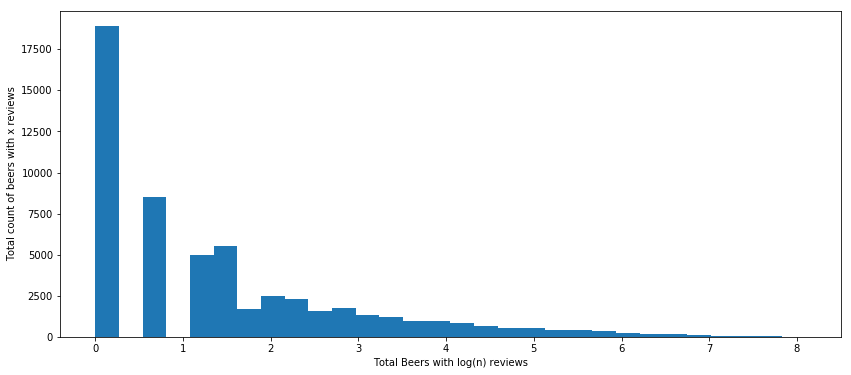

In [13]:
# Histogram of log(beer_review_counts)
plt.figure(figsize=[14,6])
plt.hist(np.log(beer_review_counts[beer_review_counts['review_profilename'] >= 1].values),  bins=30)
plt.xlabel('Total Beers with log(n) reviews')
plt.ylabel('Total count of beers with x reviews')
plt.show()

# There is a beer with a total review count of 0, 

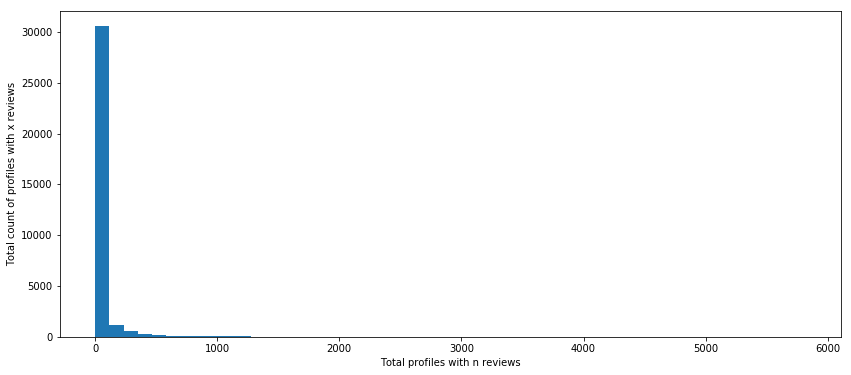

,beer_name
count,33387.000000
mean,47.511487
std,182.599759
min,1.000000
25%,1.000000
50%,3.000000
75%,16.000000
max,5817.000000


In [14]:
# review_profile_total is a series with an index by 'review_profilename', 
# and a count of how many reviews that profile has under 'beer_name'
review_profile_total = reviews.loc[:,['beer_name', 'review_profilename']].groupby(['review_profilename'], axis=0).count()

# Histogram of review_profile_total
plt.figure(figsize=[14,6])
plt.hist(review_profile_total['beer_name'].values,  bins=50)
plt.xlabel('Total profiles with n reviews')
plt.ylabel('Total count of profiles with x reviews')
plt.show()

review_profile_total.describe()

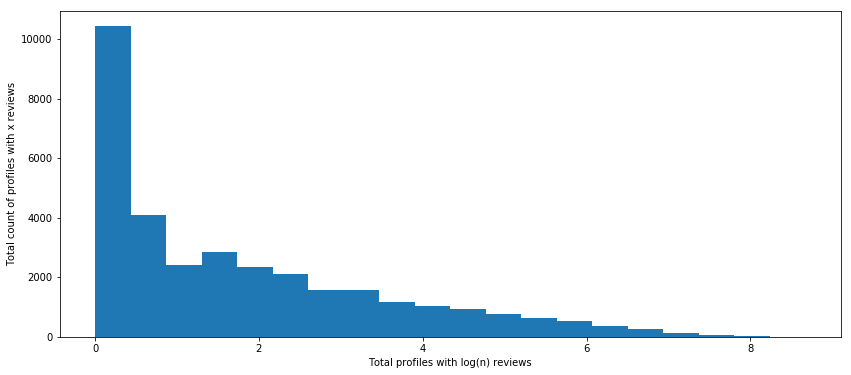

In [15]:
# Histogram of beer_review_counts
plt.figure(figsize=[14,6])
plt.hist(np.log(review_profile_total['beer_name'].values),  bins=20)
plt.xlabel('Total profiles with log(n) reviews')
plt.ylabel('Total count of profiles with x reviews')
plt.show()

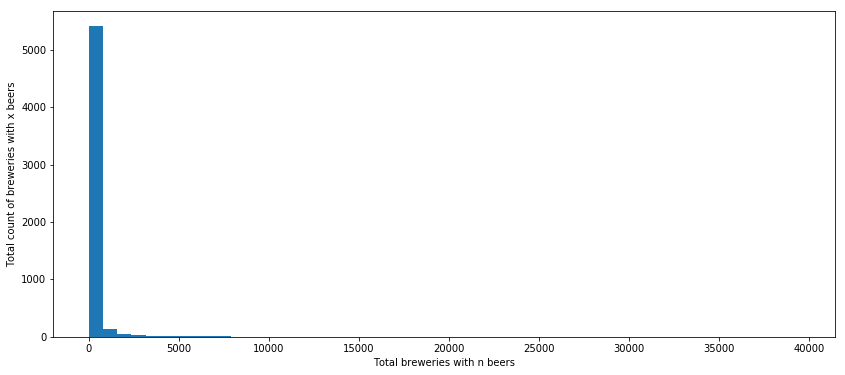

,beer_name
count,5742.000000
mean,276.314699
std,1500.440673
min,1.000000
25%,3.000000
50%,14.000000
75%,73.000000
max,39444.000000


In [16]:
# beers_per_brewery is a series with an index by 'brewery_name', 
# and a count of how many beers that brewery has under 'beer_name'
beers_per_brewery = reviews.loc[:,['brewery_name', 'beer_name']].groupby('brewery_name', axis=0).count()

# Histogram of review_profile_total
plt.figure(figsize=[14,6])
plt.hist(beers_per_brewery['beer_name'].values,  bins=50)
plt.xlabel('Total breweries with n beers')
plt.ylabel('Total count of breweries with x beers')
plt.show()

beers_per_brewery.describe()

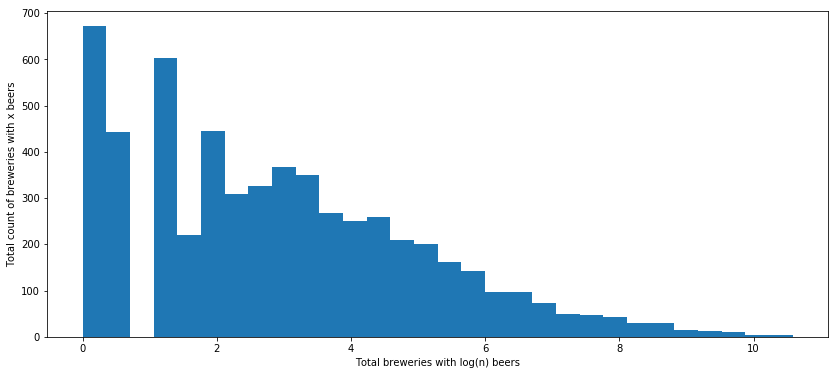

In [17]:
plt.figure(figsize=[14,6])
plt.hist(np.log(beers_per_brewery['beer_name'].values),  bins=30)
plt.xlabel('Total breweries with log(n) beers')
plt.ylabel('Total count of breweries with x beers')
plt.show()

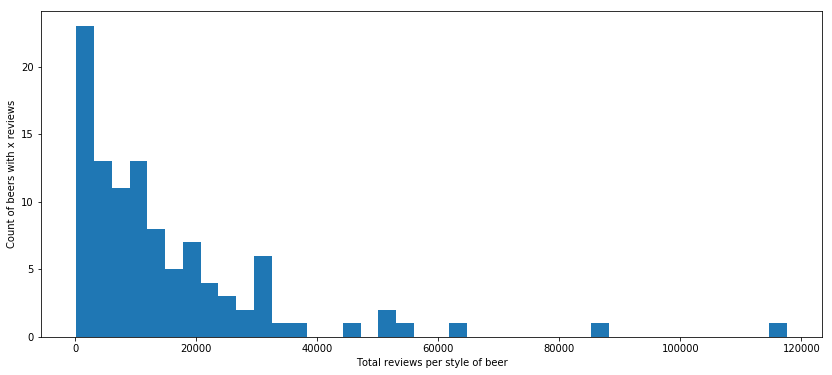

,beer_name
count,104.000000
mean,15255.903846
std,17830.331881
min,241.000000
25%,3952.750000
50%,9978.000000
75%,19644.750000
max,117586.000000


In [18]:
# beers_style_counts is a series with an index by 'beer_style', 
# and a count of how many beers of that style under 'beer_name'

beer_style_counts = reviews.loc[:,['beer_style', 'beer_name']].groupby('beer_style').count()

# Histogram of
plt.figure(figsize=[14,6])
plt.hist(beer_style_counts['beer_name'].values, bins=40)
plt.xlabel('Total reviews per style of beer')
plt.ylabel('Count of beers with x reviews')
plt.show()

beer_style_counts.describe()